In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings='ignore'
from sklearn.cluster import KMeans
import os

import math
%matplotlib inline

In [2]:
employment=pd.read_csv('/Users/macos/Desktop/student crisis/Long_empl_household_dynamics/all_employement_flow.csv')
earnings=pd.read_csv('/Users/macos/Desktop/student crisis/Long_empl_household_dynamics/all_earnings.csv')

/Users/macos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
employment.dtypes

agg_level_pseo                    int64
inst_level                       object
institution                       int64
degree_level                      int64
cip_level                        object
cipcode                           int64
grad_cohort                       int64
grad_cohort_years                 int64
geo_level                        object
geography                        object
ind_level                        object
industry                         object
y1_grads_emp                    float64
y1_grads_emp_instate            float64
y5_grads_emp                    float64
y5_grads_emp_instate            float64
y10_grads_emp                   float64
y10_grads_emp_instate           float64
status_y1_grads_emp               int64
status_y1_grads_emp_instate       int64
status_y5_grads_emp               int64
status_y5_grads_emp_instate       int64
status_y10_grads_emp              int64
status_y10_grads_emp_instate      int64
dtype: object

In [4]:
# infinity
earnings = earnings.replace([np.inf, -np.inf], np.nan)

In [5]:
# convert object to float
earnings["y1_p25_earnings"] = pd.to_numeric(earnings.y1_p25_earnings, errors='coerce')
earnings["y1_p50_earnings"] = pd.to_numeric(earnings.y1_p50_earnings, errors='coerce')
earnings["y1_p75_earnings"] = pd.to_numeric(earnings.y1_p75_earnings, errors='coerce')
earnings["y1_grads_earn"] = pd.to_numeric(earnings.y1_grads_earn, errors='coerce')
earnings["y5_p25_earnings"] = pd.to_numeric(earnings.y5_p25_earnings, errors='coerce')
earnings["y5_p50_earnings"] = pd.to_numeric(earnings.y5_p50_earnings, errors='coerce')
earnings["y5_p75_earnings"] = pd.to_numeric(earnings.y5_p75_earnings, errors='coerce')
earnings["y10_p25_earnings"] = pd.to_numeric(earnings.y10_p25_earnings, errors='coerce')
earnings["y10_p50_earnings"] = pd.to_numeric(earnings.y10_p50_earnings, errors='coerce')
earnings["y10_p75_earnings"] = pd.to_numeric(earnings.y10_p75_earnings, errors='coerce')
earnings["y1_ipeds_count"] = pd.to_numeric(earnings.y1_ipeds_count, errors='coerce')
earnings["y5_ipeds_count"] = pd.to_numeric(earnings.y5_ipeds_count, errors='coerce')
earnings["y10_ipeds_count"] = pd.to_numeric(earnings.y10_ipeds_count, errors='coerce')

In [6]:
mode=earnings.y1_p25_earnings.mode()
mode1=earnings.y1_p50_earnings.mode()
mode2=earnings.y1_p75_earnings.mode()
mode3=earnings.y1_grads_earn.mode()
mode4=earnings.y1_grads_earn.mode()

In [7]:
earnings.y1_p25_earnings.fillna(mode)
earnings.y1_p50_earnings.fillna(mode1)
earnings.y1_p75_earnings.fillna(mode2)
earnings.y1_grads_earn.fillna(mode3)
earnings.y1_grads_earn.fillna(mode4)

0         219.0
1        2627.0
2        2850.0
3        3751.0
4        1777.0
          ...  
13408       NaN
13409      43.0
13410      48.0
13411     758.0
13412       NaN
Name: y1_grads_earn, Length: 13413, dtype: float64

In [8]:
earnings.isnull().sum()

agg_level_pseo               0
inst_level                   0
institution                  0
degree_level                 0
cip_level                    0
cipcode                      0
grad_cohort                  0
grad_cohort_years            0
geo_level                    0
geography                    0
ind_level                    0
industry                     0
y1_p25_earnings           5734
y1_p50_earnings           5734
y1_p75_earnings           5734
y1_grads_earn             5734
y5_p25_earnings           7445
y5_p50_earnings           7445
y5_p75_earnings           7445
y5_grads_earn             7445
y10_p25_earnings         10050
y10_p50_earnings         10050
y10_p75_earnings         10050
y10_grads_earn           10050
y1_ipeds_count            2477
y5_ipeds_count            4949
y10_ipeds_count           8362
status_y1_earnings           0
status_y1_grads_earn         0
status_y5_earnings           0
status_y5_grads_earn         0
status_y10_earnings          0
status_y

In [41]:
earn=earnings.dropna()

NameError: name 'industry' is not defined

## YEAR 1

In [44]:
col=['institution', 'degree_level', 'grad_cohort', 'grad_cohort_years','y1_p25_earnings','y1_p50_earnings', 'y1_p75_earnings', 'y1_grads_earn']
year1=earn[col]

In [35]:
year1.y1_p25_earnings.value_counts()

21508.0    14
24035.0    14
29685.0    13
20140.0    12
27512.0    11
           ..
48803.0     1
17964.0     1
17550.0     1
49730.0     1
23808.0     1
Name: y1_p25_earnings, Length: 2050, dtype: int64

In [36]:
year1.isnull().sum()

institution          0
degree_level         0
grad_cohort          0
grad_cohort_years    0
y1_p25_earnings      0
y1_p50_earnings      0
y1_p75_earnings      0
y1_grads_earn        0
dtype: int64

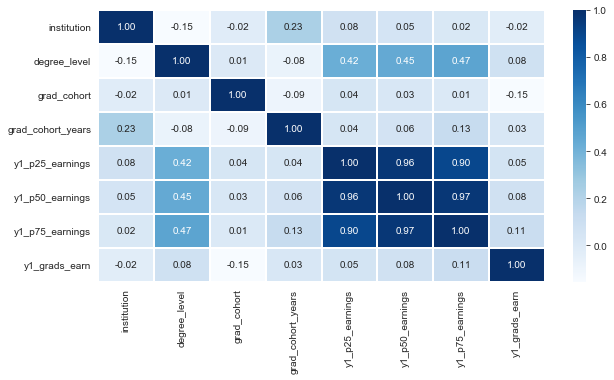

In [13]:
# corralation
plt.figure(figsize=(10,5))
sns.heatmap(year1.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=1)
plt.show()

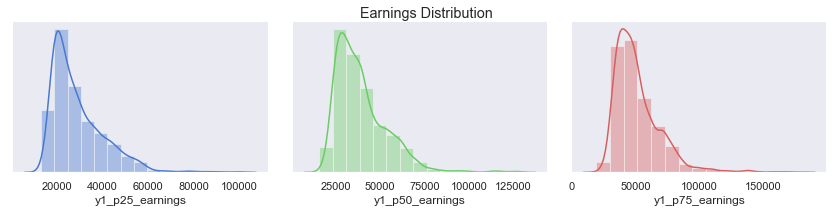

In [14]:
sns.set(style='dark', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(year1['y1_p25_earnings'], bins=15, ax=axs[0],color='b')
axs[1] = sns.distplot(year1['y1_p50_earnings'], bins=15, ax=axs[1],color='g')
axs[2] = sns.distplot(year1['y1_p75_earnings'], bins=15, ax=axs[2],color='r')
fig.suptitle('Earnings Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

Earnings are positively skewed 

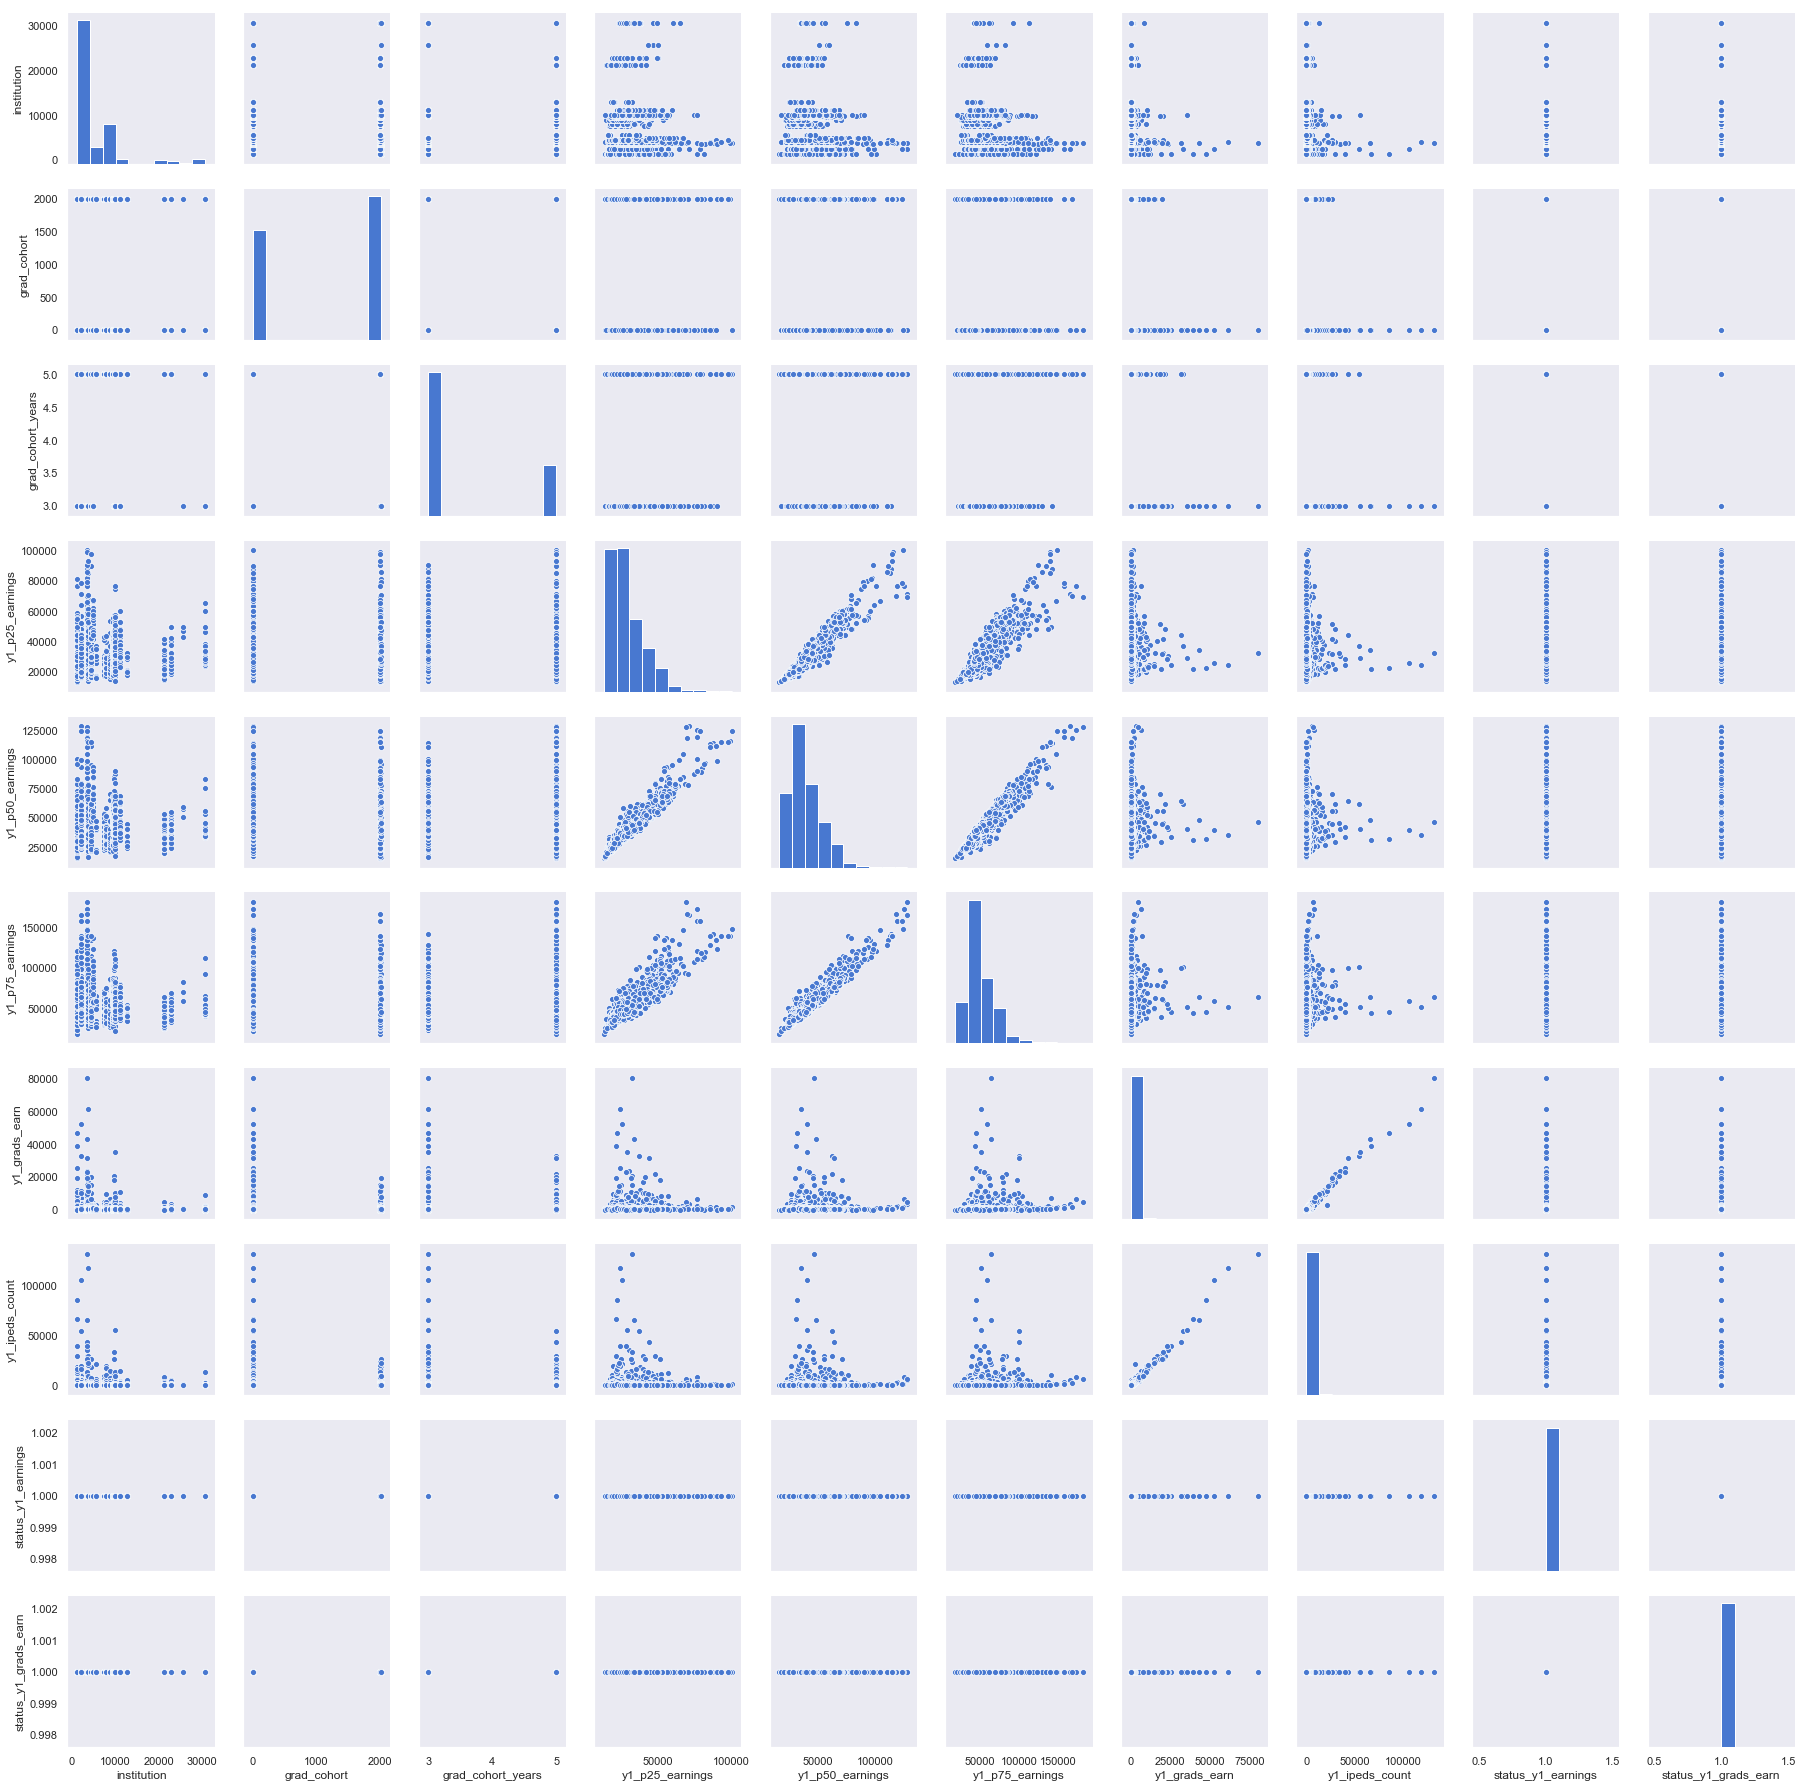

In [15]:
# Let's see our data in a detailed way with pairplot
v=['y1_p25_earnings', 'y1_p50_earnings','y1_p75_earnings']
V = year1[v]
sns.pairplot(year1.drop('degree_level',axis=1))
# sns.scatterplot((year1['y1_p50_earnings'],year1['y1_p25_earnings']),hue='degree_level',aspect=1.5)

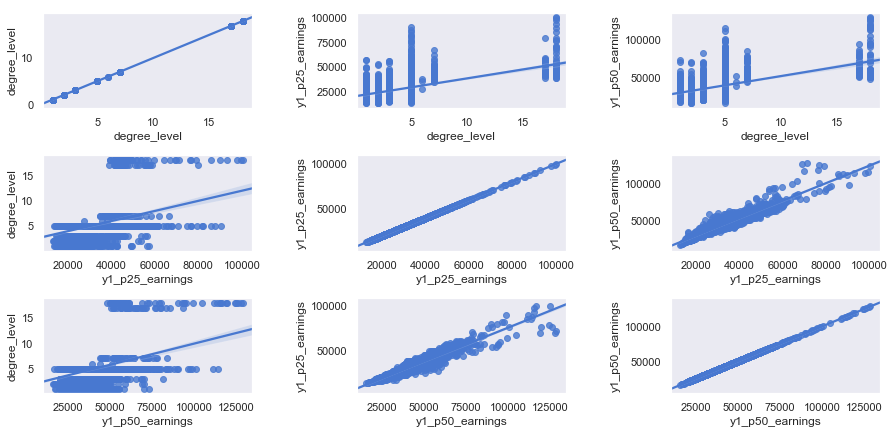

In [18]:
# correlation of degree level vs earnings
plt.figure(1,figsize=(15,7))
n=0
for x in ['degree_level','y1_p25_earnings','y1_p50_earnings']:
    for y in ['degree_level','y1_p25_earnings','y1_p50_earnings']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x=x,y=y,data=year1)
        plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

In [15]:
# Statistical summry
year1.y1_p25_earnings.describe()

count      2695.000000
mean      29115.310204
std       11618.611866
min       12961.000000
25%       20290.000000
50%       25615.000000
75%       35011.500000
max      100335.000000
Name: y1_p25_earnings, dtype: float64

In [21]:
from sklearn.cluster import KMeans


Text(0.5, 1.0, 'The elbow curve')

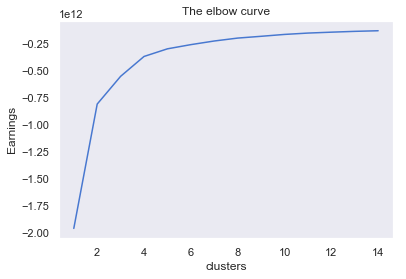

In [17]:
years=[]
for a in range(1,15):
    kmeans = KMeans(n_clusters=a,init='k-means++')
    yea = kmeans.fit(year1)
    years.append(yea.score(year1))
plt.plot(range(1,15),years)
plt.xlabel('clusters')
plt.ylabel('Earnings')
plt.title('The elbow curve')
    

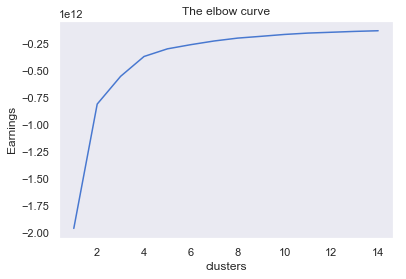

In [18]:
years=[]
for a in range(1,15):
    kmeans = KMeans(n_clusters=a, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True,
                    verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
    yea = kmeans.fit(year1)
    years.append(yea.score(year1))
plt.plot(range(1,15),years)
plt.xlabel('clusters')
plt.ylabel('Earnings')
plt.title('The elbow curve')
plt.show()


Both elbows from tuned and non tuned parameters suggests the number of clusters as 4(k=4)

## clustering

In [33]:
year1.head(2)

,institution,degree_level,grad_cohort,grad_cohort_years,y1_p25_earnings,y1_p50_earnings,y1_p75_earnings,y1_grads_earn,our labels
0,1345,Associates,0,5,15477.0,21368.0,29225.0,219.0,0
1,1345,Baccalaureate,0,3,20656.0,28871.0,38176.0,2627.0,0


/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


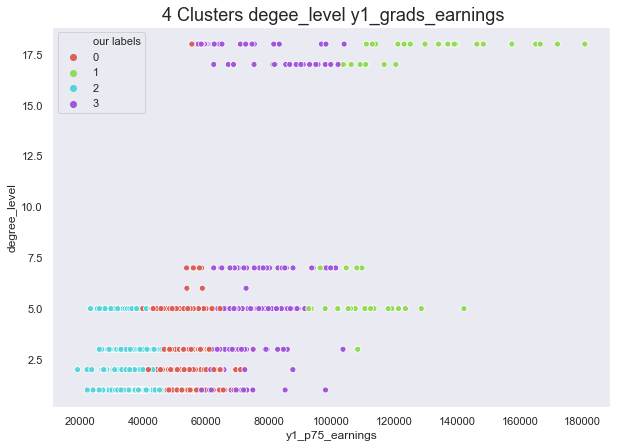

In [22]:
kmc=KMeans(n_clusters=4).fit(year1)
year1['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(year1['y1_p75_earnings'],year1['degree_level'],
                hue=year1['our labels'],palette=sns.color_palette('hls',4))
plt.title(' 4 Clusters degee_level y1_grads_earnings',fontsize=18)
plt.show()

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


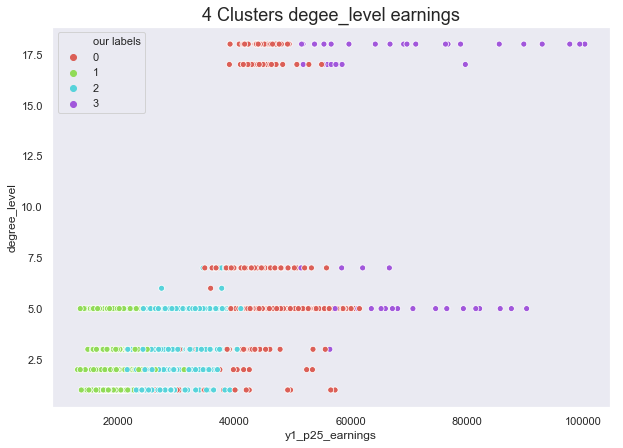

In [24]:
kmc=KMeans(n_clusters=4).fit(year1)
year1['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(year1['y1_p25_earnings'],year1['degree_level'],
                hue=year1['our labels'],palette=sns.color_palette('hls',4))
plt.title('4 Clusters degee_level earnings',fontsize=18)
plt.show()

### Degree levels

1:Certificate< 1 year

2: Certificate_1-2_years

3:Associates

4:Certificate_2-4_years

5:Baccalaureate

6:Post-Bacc Certificate

7:Masters

8:Post_Masters_Certificate,

17:Doctoral_Research_Scholarship

18:Doctoral_Professional Practice

From the above visualizations, K=4 would be the best number of clusters to group degree levels and how much each degee level one earns

Those with high degree are only grouped in two categories

6:Post-Bacc Certificate had the least earners

A group of 5:Baccalaureates   earn almost the same amount with 18:Doctoral_Professional Practice




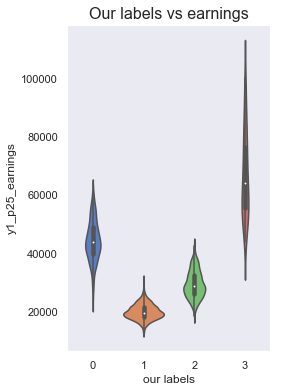

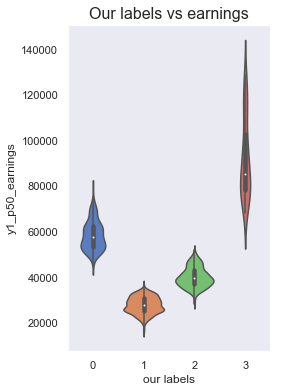

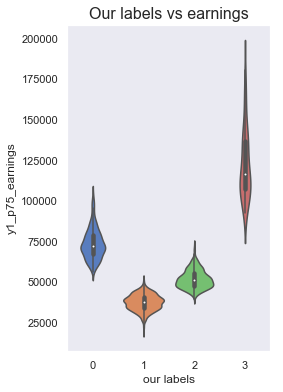

In [25]:
# Calculating mean, median and mode of those four categories

fig=plt.figure(figsize=(8,6))

ax = plt.subplot(122)
sns.violinplot(x='our labels', y='y1_p25_earnings', data=year1, ax=ax)
ax.set_title('Our labels vs earnings',fontsize=16)

plt.show()
fig=plt.figure(figsize=(8,6))
ax = plt.subplot(122)
sns.violinplot(x='our labels', y='y1_p50_earnings', data=year1, ax=ax)
ax.set_title('Our labels vs earnings',fontsize=16)

plt.show()
fig=plt.figure(figsize=(8,6))
ax = plt.subplot(122)
sns.violinplot(x='our labels', y='y1_p75_earnings', data=year1, ax=ax)
ax.set_title('Our labels vs earnings',fontsize=16)

plt.show()

The white dot represent the median earnings and the black block inside the violin shows the upper and the lower quantiles for the four clusters

In [28]:
year1.degree_level.replace([1,2,3,4,5,6,7,8,17,18],['Certificate< 1 year','Certificate_1-2_years','Associates',
                                                   'Certificate_2-4_years','Baccalaureate','Post-Bacc Certificate',
                                                   'Masters','Post_Masters_Certificate','Doctoral_Research_Scholarship',
                                                   'Doctoral_Professional Practice'],inplace=True)

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


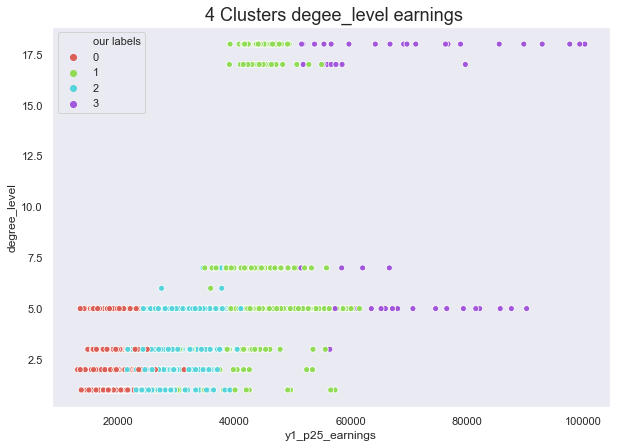

In [37]:
kmc=KMeans(n_clusters=4).fit(year1)
year1['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(year1['y1_p25_earnings'],year1['degree_level'],
                hue=year1['our labels'],palette=sns.color_palette('hls',4))
plt.title(' 4 Clusters degee_level earnings',fontsize=18)
plt.show()

In [154]:
# plotting 3d
from mpl_toolkits.mplot3d import Axes3D
ax = fig.gca(projection='3d')

# ax = plt.subplot(projection='3d')
# ax.plt.subplot(111,projection='3d')
aa=year1.degree_level
bb= year1.y1_p25_earnings
cc= year1.institution
ax.scatter(aa,bb,cc,s=4)
plt.show()

### Create a target column called Cluster

In [48]:

kmeanc=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
no_cluster=kmeanc.fit_predict(year1)

In [49]:
year1['Cluster']=no_cluster

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Explore and analysis target with institution

In [50]:
ye=year1.groupby('institution')
ye1=ye['Cluster'].value_counts().sort_values(ascending=False)
# empl_y5=emp_institution_year5['y10_grads_emp'].sum().sort_values(ascending=False)
ye1.head(10)


institution  Cluster
3895         2          134
1350         2          105
3658         1           97
1370         2           97
2325         2           89
10115        1           77
3656         1           73
1349         2           71
3599         1           69
3895         0           59
Name: Cluster, dtype: int64

In [51]:
pp=year1[year1['institution']==3895].groupby('Cluster')['degree_level'].value_counts().sort_values(ascending=False)

In [121]:
pp=pd.DataFrame(pp)

Cluster  degree_level
0        5               134
1        5                47
2        5                46
1        18                8
3        18                2
         5                 2
1        17                2
         7                 2
Name: degree_level, dtype: int64

## year5

In [69]:
cols=['institution', 'degree_level', 'grad_cohort', 'grad_cohort_years','y5_p25_earnings','y5_p50_earnings', 'y5_p75_earnings', 'y5_grads_earn']
year5=earn[cols]


Text(0.5, 1.0, 'The elbow curve')

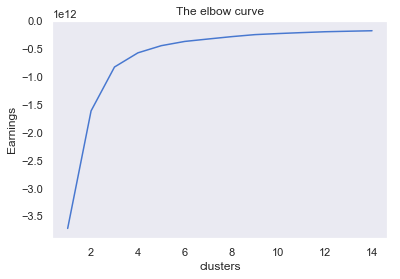

In [73]:
year_r=[]
for b in range(1,15):
    kmeans = KMeans(n_clusters=b,init='k-means++')
    yy = kmeans.fit(year5)
    year_r.append(yy.score(year5))
plt.plot(range(1,15),year_r)
plt.xlabel('clusters')
plt.ylabel('Earnings')
plt.title('The elbow curve')

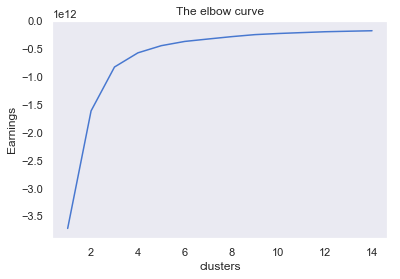

In [72]:
year_r=[]
for b in range(1,15):
    kmeans = KMeans(n_clusters=b, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True,
                    verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
    yeah = kmeans.fit(year5)
    year_r.append(yeah.score(year5))
plt.plot(range(1,15),year_r)
plt.xlabel('clusters')
plt.ylabel('Earnings')
plt.title('The elbow curve')
plt.show()



/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


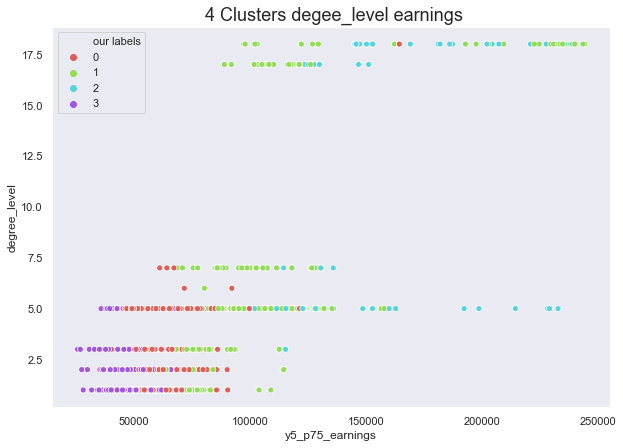

In [74]:
kmc=KMeans(n_clusters=4).fit(year1)
year5['our labels']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(year5['y5_p75_earnings'],year1['degree_level'],
                hue=year5['our labels'],palette=sns.color_palette('hls',4))
plt.title(' 4 Clusters degee_level earnings',fontsize=18)
plt.show()

# ALL_years

In [75]:
earn.columns

Index(['agg_level_pseo', 'inst_level', 'institution', 'degree_level',
       'cip_level', 'cipcode', 'grad_cohort', 'grad_cohort_years', 'geo_level',
       'geography', 'ind_level', 'industry', 'y1_p25_earnings',
       'y1_p50_earnings', 'y1_p75_earnings', 'y1_grads_earn',
       'y5_p25_earnings', 'y5_p50_earnings', 'y5_p75_earnings',
       'y5_grads_earn', 'y10_p25_earnings', 'y10_p50_earnings',
       'y10_p75_earnings', 'y10_grads_earn', 'y1_ipeds_count',
       'y5_ipeds_count', 'y10_ipeds_count', 'status_y1_earnings',
       'status_y1_grads_earn', 'status_y5_earnings', 'status_y5_grads_earn',
       'status_y10_earnings', 'status_y10_grads_earn', 'status_ipeds_count'],
      dtype='object')

In [77]:
earn.industry.value_counts()

0    2695
Name: industry, dtype: int64

In [52]:
col_all=['degree_level','cipcode','grad_cohort_years','y1_p25_earnings','y1_p50_earnings', 'y1_p75_earnings', 'y1_grads_earn',
       'y5_p25_earnings', 'y5_p50_earnings', 'y5_p75_earnings',
       'y5_grads_earn', 'y10_p25_earnings', 'y10_p50_earnings',
       'y10_p75_earnings', 'y10_grads_earn']
all=earn[col_all]

In [53]:
all.shape

(2695, 15)

In [54]:
all["cipcode"] = pd.to_numeric(all.cipcode, errors='coerce')



/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'THE ELBOW CURVE')

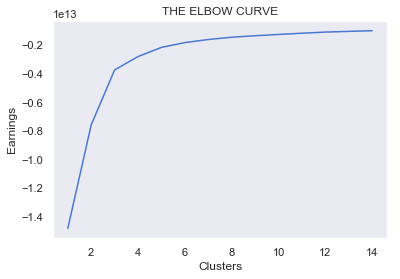

In [55]:
# choosing clustering
year_all=[]
for c in range(1,15):
    kmeans = KMeans(n_clusters=c,init='k-means++')
    z = kmeans.fit(all)
    year_all.append(z.score(all))
plt.plot(range(1,15),year_all)
plt.xlabel('Clusters')
plt.ylabel('Earnings')
plt.title('THE ELBOW CURVE')

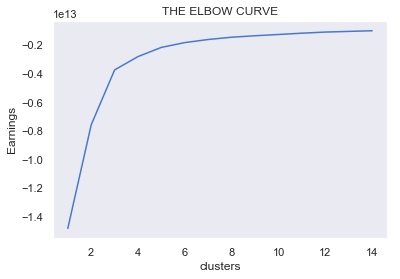

In [56]:
year_r=[]
for b in range(1,15):
    kmeans = KMeans(n_clusters=b, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances=True,
                    verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
    yeah = kmeans.fit(all)
    year_r.append(yeah.score(all))
plt.plot(range(1,15),year_r)
plt.xlabel('clusters')
plt.ylabel('Earnings')
plt.title('THE ELBOW CURVE')
plt.show()

Number of clusters (k=4)

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


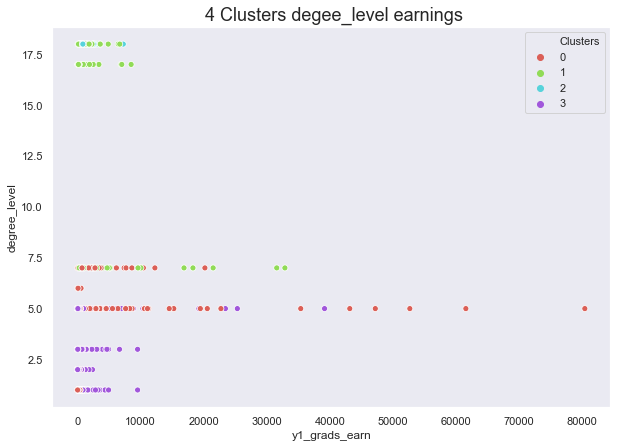

In [63]:
kmc=KMeans(n_clusters=4).fit(all)
all['Clusters']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(all['y1_grads_earn'],year1['degree_level'],
                hue=all['Clusters'],palette=sns.color_palette('hls',4))
plt.title(' 4 Clusters degee_level earnings',fontsize=18)
plt.show()

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


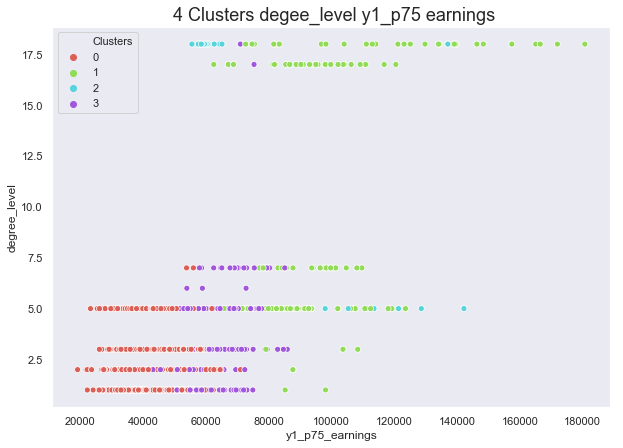

In [64]:
kmc=KMeans(n_clusters=4).fit(all)
all['Clusters']=kmc.labels_
plt.figure(figsize=(10,7))
sns.scatterplot(all['y1_p75_earnings'],all['degree_level'],
                hue=all['Clusters'],palette=sns.color_palette('hls',4))
plt.title(' 4 Clusters degee_level y1_p75 earnings',fontsize=18)
plt.show()

### Create a target column called Cluster

In [65]:
kmeanc=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
all_target=kmeanc.fit_predict(all)

In [66]:
all['Cluster']=all_target

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
all.head(2)

,degree_level,cipcode,grad_cohort_years,y1_p25_earnings,y1_p50_earnings,y1_p75_earnings,y1_grads_earn,y5_p25_earnings,y5_p50_earnings,y5_p75_earnings,y5_grads_earn,y10_p25_earnings,y10_p50_earnings,y10_p75_earnings,y10_grads_earn,Clusters,Cluster
0,3,0.0,5,15477.0,21368.0,29225.0,219.0,24962.0,33592.0,48237.0,147.0,31254.0,45383.0,62508.0,83.0,0,2
1,5,0.0,3,20656.0,28871.0,38176.0,2627.0,29698.0,39148.0,50406.0,1794.0,31744.0,44170.0,58952.0,1010.0,0,2


Text(0.5, 1.0, 'Cluster counts')

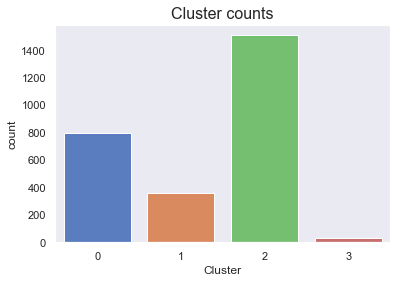

In [69]:
sns.countplot(all.Cluster)
plt.title('Cluster counts',fontsize=16)


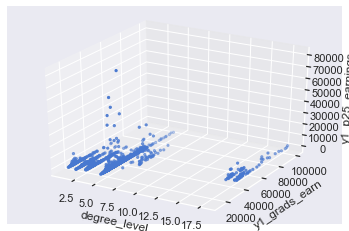

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
fig = plt.figure()
ax = fig.gca(projection='3d')

xs = all.degree_level
ys = all.y1_p25_earnings
zs = all.y1_grads_earn
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('degree_level')
ax.set_ylabel('y1_grads_earn')
ax.set_zlabel('y1_p25_earnings')

plt.show()